<a href="https://colab.research.google.com/github/TeigenMillies/MAT422/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likelihood Estimation
---------------------------------------------------------
- MLE for random samples
- Linear regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

# 2.4.1. MLE for random samples
Maximum likelihood estimation (MLE) is an effective approach of estimating
the parameters of a probability distribution through maximizing a likelihood
function. The point in the parameter space that maximizes the likelihood
function is called the maximum likelihood estimate. The logic of maximum
likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference.

Let X1, X2, . . . , Xn have joint pmf or pdf

 f(x1, x2, . . . , xn; θ1, . . . , θm)

 where the parameters θ1, . . . , θm have unknown values. When x1, . . . , xn are the observed sample values and is regarded as a function of θ1, . . . , θm, it is called the likelihood function. The maximum likelihood estimates (mle’s) ˆθ1, . . . , ˆθm are those values of the θi’s that maximize the likelihood function, so that

equation.PNG

 When the Xi ’s are substituted in place of the xi ’s, the maximum likelihood estimators result.

 Let X1, . . . , Xn be a random sample from a normal distribution.
The likelihood function is

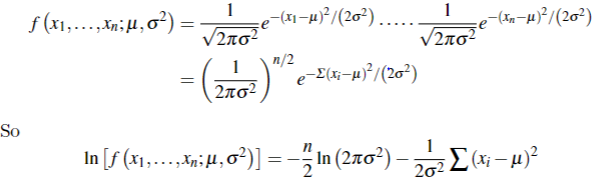

To find the maximizing values of μ and σ 2, we must take the partial derivatives of ln( f ) with respect to μ and σ 2, equate them to zero, and solve the resulting two equations. First taking derivative with respect to μ, we have

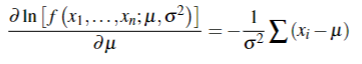

Equating the derivative zero and solving for μ result in the following

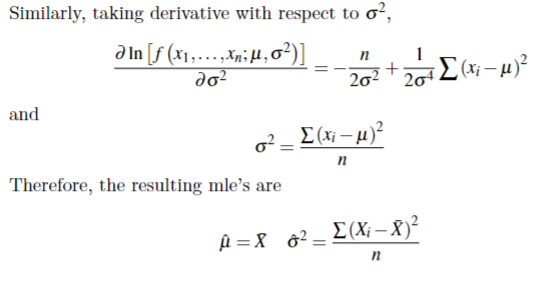

True mu: 5, MLE mu: 5.037821705099211
True sigma: 2, MLE sigma: 1.9733416130923371


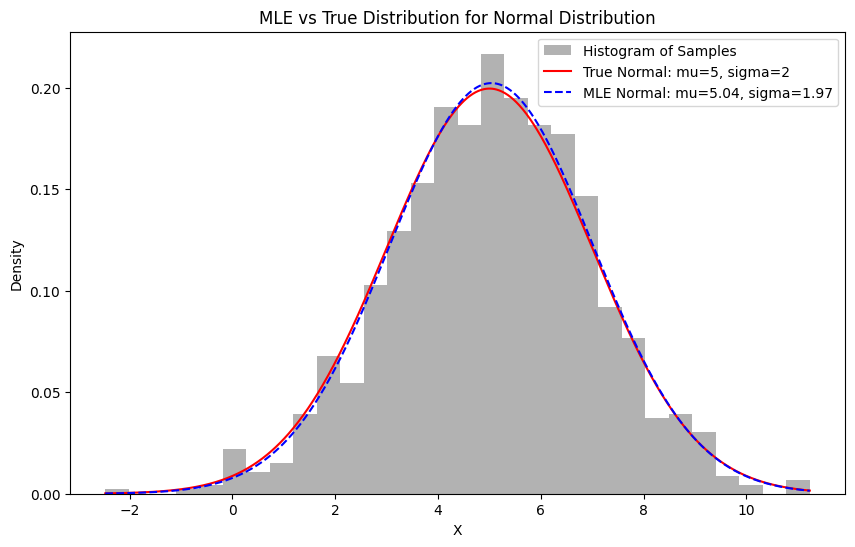

In [2]:
# Generate random samples from a normal distribution
true_mu = 5
true_sd = 2
n_samples = 1000

# Generate random samples from normal distribution with true parameters
samples = np.random.normal(loc=true_mu, scale=true_sd, size=n_samples)

# Define the log-likelihood function for the normal distribution
def log_likelihood_normal(mu, sigma, data):
    n = len(data)
    log_likelihood = -n/2 * np.log(2 * np.pi) - n * np.log(sigma) - (1/(2 * sigma**2)) * np.sum((data - mu)**2)
    return log_likelihood

# Find the MLE estimates for mu and sigma
mle_mu = np.mean(samples)  # MLE for the mean
mle_sigma = np.sqrt(np.var(samples, ddof=0))  # MLE for the standard deviation

# Compare parameters with MLE estimates
print(f"True mu: {true_mu}, MLE mu: {mle_mu}")
print(f"True sigma: {true_sd}, MLE sigma: {mle_sigma}")

# Plot the histogram of samples and overlay the true and MLE normal distributions
x = np.linspace(min(samples), max(samples), 1000)
true_pdf = norm.pdf(x, loc=true_mu, scale=true_sd)
mle_pdf = norm.pdf(x, loc=mle_mu, scale=mle_sigma)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='gray', label='Histogram of Samples')
plt.plot(x, true_pdf, 'r-', label=f'True Normal: mu={true_mu}, sigma={true_sd}')
plt.plot(x, mle_pdf, 'b--', label=f'MLE Normal: mu={mle_mu:.2f}, sigma={mle_sigma:.2f}')
plt.title("MLE vs True Distribution for Normal Distribution")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()


# 2.4.2. Linear regression
Given input data points INPUT POINTS PNG, we seek an aﬀine function to fit the data and each xi = (xi1, ...., xip). The common approach involves finding coefficients β j, j = 1..., p’s that minimize the criterion

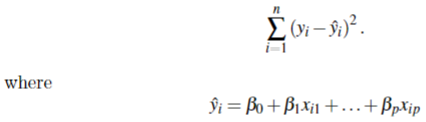

Now we wish to discuss it from a probabilistic point of view by the maximum
likelihood estimation. Consider that we have n points, each of which is drawn
in an independent and identically distributed (i.i.d.) way from the normal
distribution. For a given, μ, σ 2, the probability of those n points being drawn
define the likelihood function, which are just the multiplication of n normal
probability density functions (pdf) (because they are independent).

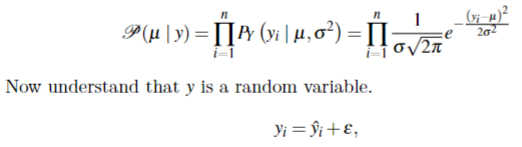

where ε ∼ N (0, σ^2). Thus, yi is a normal variable with mean as a linear
function of x and a fixed standard deviation:

yi ∼ N ( ˆyi, σ^2)

As a result, for each yi, we choose μ in the normal distributions as

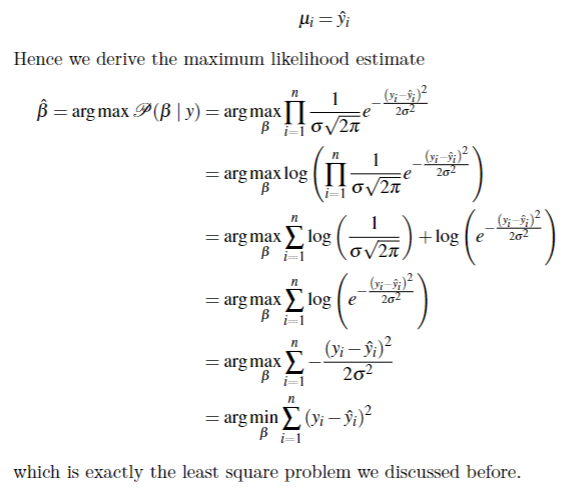

True slope: 2.5, Estimated slope: 2.5278323574489083
True intercept: 5, Estimated intercept: 4.865010512556223


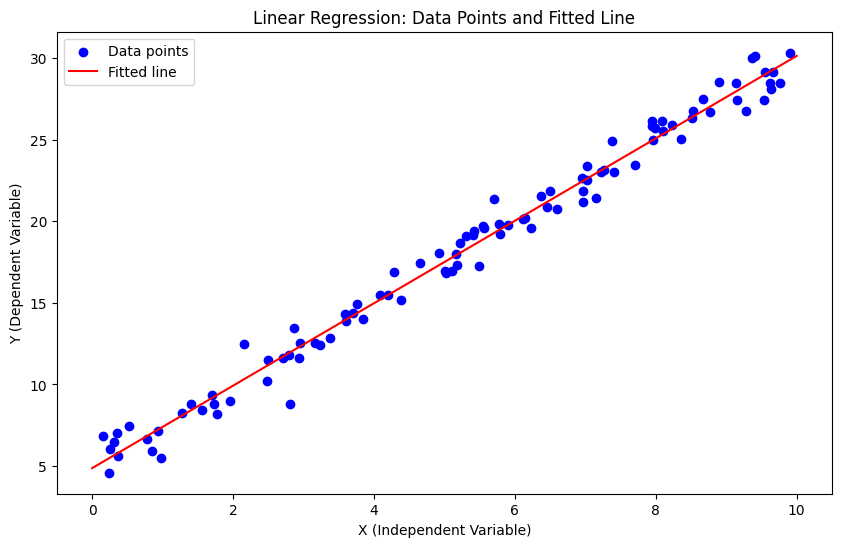

In [5]:
# Create random X values between 0 and 10
X = 10 * np.random.rand(100, 1)

# Create a linear relationship between X and Y with some random error
true_slope = 2.5
true_intercept = 5
error = np.random.randn(100, 1)  # Normally distributed random noise
Y = true_slope * X + true_intercept + error

# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the estimated slope and intercept from the model
estimated_slope = model.coef_[0][0]
estimated_intercept = model.intercept_[0]

print(f"True slope: {true_slope}, Estimated slope: {estimated_slope}")
print(f"True intercept: {true_intercept}, Estimated intercept: {estimated_intercept}")

# Visualize the data and the fitted regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X, Y, color='blue', label='Data points')

# Regression line
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
Y_line = model.predict(X_line)
plt.plot(X_line, Y_line, color='red', label='Fitted line')

# Formatting
plt.title("Linear Regression: Data Points and Fitted Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.legend()
plt.show()
